In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df0 = pd.read_csv('0D.csv')

df1 = pd.read_csv('1D.csv')

df2 = pd.read_csv('2D.csv')

df3 = pd.read_csv('3D.csv')

df4 = pd.read_csv('4D.csv')
# Access the dataset using DataFrame operations


In [3]:
# Display the first few rows of the dataset
df0=df0.head(100000)
df1=df1.head(100000)
df2=df2.head(100000)
df3=df3.head(100000)
df4=df4.head(100000)
print(df0.head())

   V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3
0   0.0     28.610235          0.0          0.0          0.0
1   0.0     28.610235          0.0          0.0          0.0
2   0.0     28.610235          0.0          0.0          0.0
3   0.0     28.610235          0.0          0.0          0.0
4   0.0     28.610235          0.0          0.0          0.0


In [4]:
# Get information about the dataset, such as column names and data types
print(df0.info())

# Summary statistics of numerical columns
print(df0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   V_in          100000 non-null  float64
 1   Measured_RPM  100000 non-null  float64
 2   Vibration_1   100000 non-null  float64
 3   Vibration_2   100000 non-null  float64
 4   Vibration_3   100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB
None
                V_in  Measured_RPM    Vibration_1    Vibration_2   
count  100000.000000  1.000000e+05  100000.000000  100000.000000  \
mean        1.757136 -9.829841e+06       0.350252       0.539379   
std         0.657789  4.756777e+07       0.950394       1.292001   
min         0.000000 -2.400000e+08      -0.000379       0.000000   
25%         2.000000  6.190034e+02       0.004350       0.005749   
50%         2.000000  6.387974e+02       0.016229       0.025510   
75%         2.000000  6.439859e+02       0.166577       0.3054

In [21]:
# Assuming you have a DataFrame 'df' and a list 'output_result' containing the output result
df0['unbalance'] = 0
df1['unbalance'] = 1
df2['unbalance'] = 2
df3['unbalance'] = 3
df4['unbalance'] = 4
print(df4.head())



   V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  unbalance
0   0.0     28.610235          0.0          0.0          0.0          4
1   0.0     28.610235          0.0          0.0          0.0          4
2   0.0     28.610235          0.0          0.0          0.0          4
3   0.0     28.610235          0.0          0.0          0.0          4
4   0.0     28.610235          0.0          0.0          0.0          4


In [6]:
combined_df = pd.concat([df0,df1, df2, df3, df4, df4], axis=0, ignore_index=True)

# Print the combined DataFrame
print(combined_df)

        V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  unbalance
0       0.00     28.610235     0.000000     0.000000     0.000000          0
1       0.00     28.610235     0.000000     0.000000     0.000000          0
2       0.00     28.610235     0.000000     0.000000     0.000000          0
3       0.00     28.610235     0.000000     0.000000     0.000000          0
4       0.00     28.610235     0.000000     0.000000     0.000000          0
...      ...           ...          ...          ...          ...        ...
599995  2.05    654.049010     0.000457     0.001752     0.004630          5
599996  2.05    654.049010     0.001115     0.002046     0.004541          5
599997  2.05    654.049010     0.000992     0.003688     0.004728          5
599998  2.05    654.049010     0.000587     0.002785     0.004598          5
599999  2.05    654.049010     0.000832     0.002542     0.004597          5

[600000 rows x 6 columns]


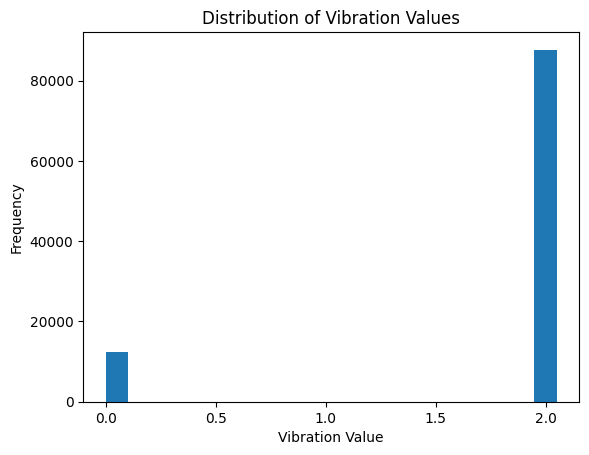

In [22]:
plt.hist(df0['V_in'],bins=20)
plt.xlabel('Vibration Value')
plt.ylabel('Frequency')
plt.title('Distribution of Vibration Values')
plt.show()

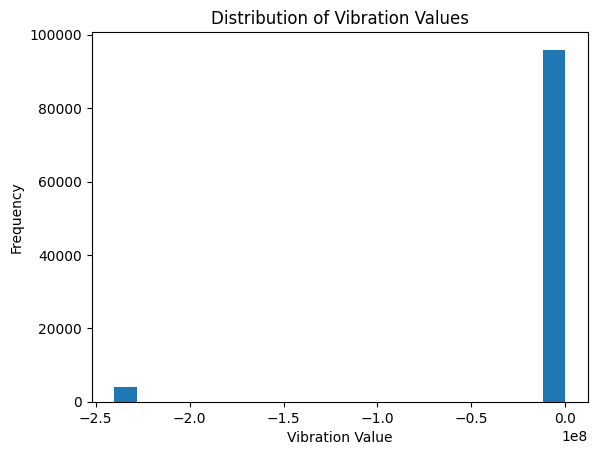

In [23]:
plt.hist(df0['Measured_RPM'],bins=20)
plt.xlabel('Vibration Value')
plt.ylabel('Frequency')
plt.title('Distribution of Vibration Values')
plt.show()

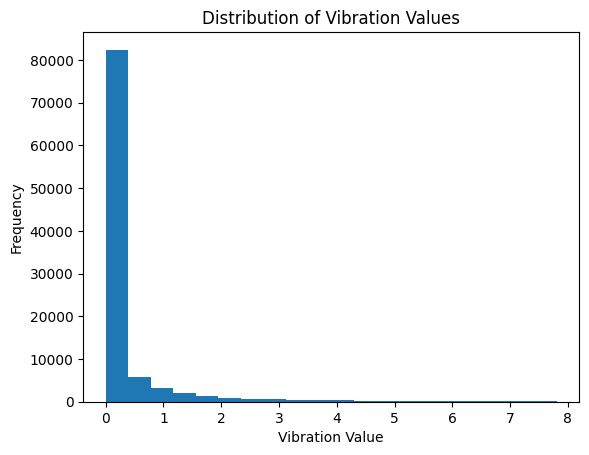

In [24]:
# Histogram of a numerical variable
plt.hist(df0['Vibration_1'],bins=20)
plt.xlabel('Vibration Value')
plt.ylabel('Frequency')
plt.title('Distribution of Vibration Values')
plt.show()

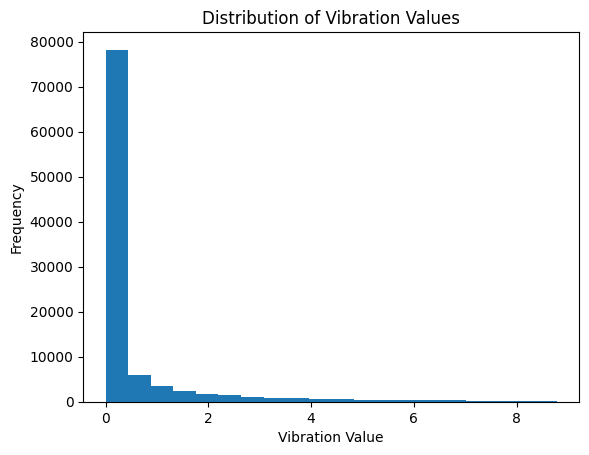

In [10]:
plt.hist(df0['Vibration_2'],bins=20)
plt.xlabel('Vibration Value')
plt.ylabel('Frequency')
plt.title('Distribution of Vibration Values')
plt.show()

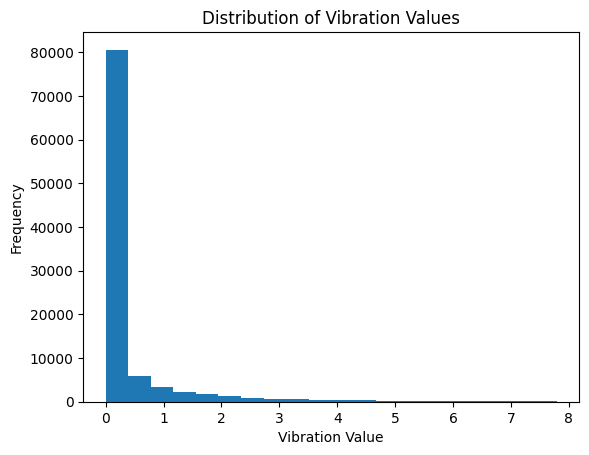

In [11]:
plt.hist(df0['Vibration_3'],bins=20)
plt.xlabel('Vibration Value')
plt.ylabel('Frequency')
plt.title('Distribution of Vibration Values')
plt.show()

In [25]:
combined_df.fillna(method='ffill', inplace=True)


# Remove rows with NaN values
# combined_df.dropna(inplace=True)



# combined_df.dropna(axis=1, inplace=True)


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_df_normalized = scaler.fit_transform(combined_df)


In [14]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with columns 'V_in', 'Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3', and 'unbalance'

# Split the data into features (X) and target (y)
X =combined_df[['V_in', 'Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3']]
y = combined_df['unbalance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)  # Check the shape of the training features
print(X_test.shape)   # Check the shape of the testing features
print(y_train.shape)  # Check the shape of the training target
print(y_test.shape)   # Check the shape of the testing target

(480000, 5)
(120000, 5)
(480000,)
(120000,)


In [18]:
import pandas as pd
import joblib
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, f1_score
rf_model=joblib.load("randomforest.pkl")

y_pred=rf_model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('MAE: {:.2f}'.format(mae))
print('RMSE: {:.2f}'.format(rmse))
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('F1 Score: {:.2f}'.format(f1score))

MAE: 0.09
RMSE: 0.60
Accuracy: 97.26%
F1 Score: 0.97


In [39]:
df11 = pd.read_csv('0E.csv',nrows=120000)

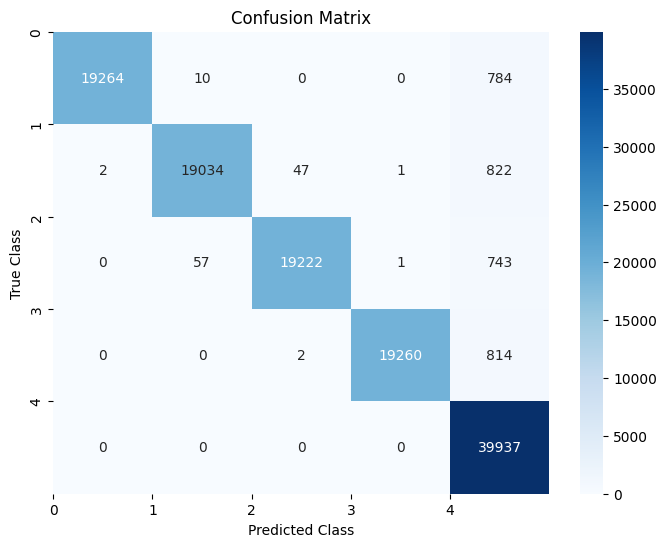

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# from sklearn.matrics import confusion_metrics

# Make predictions on the testing data
y_pred2 = rf_model.predict(X_test)
classes=[0,1,2,3,4]
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.show()

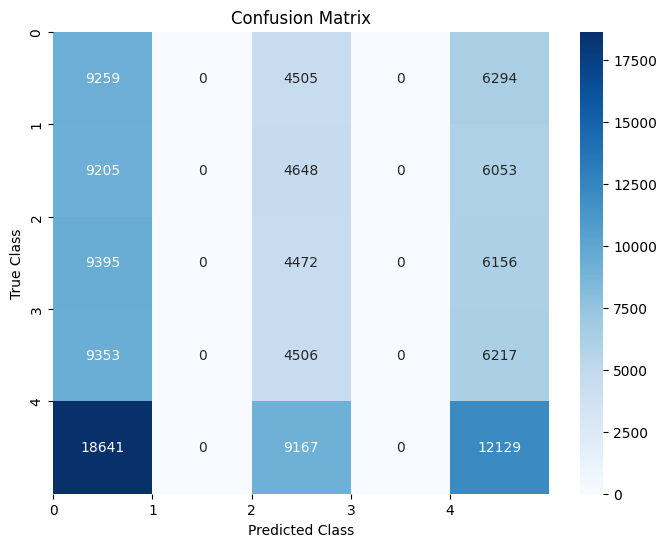

In [41]:
y_pred2 = rf_model.predict(df11)
classes=[0,1,2,3,4]
cm2 = confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.show()